<a href="https://colab.research.google.com/github/HimanshuSahoo/Python-for-Data-Scientist/blob/main/SLR_ASS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a prediction model for Salary_hike

## import dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
salary = pd.read_csv("Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salary.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

# correlation

In [4]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


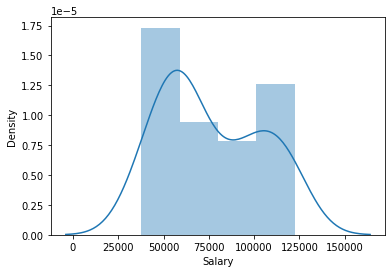

In [5]:
sns.distplot(salary['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


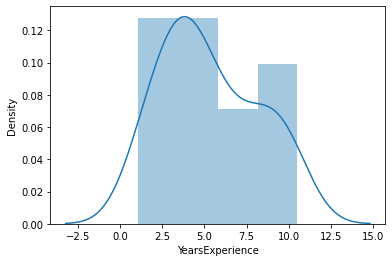

In [6]:
sns.distplot(salary['YearsExperience'])

# fitting a linear regression model

In [7]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data=salary).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


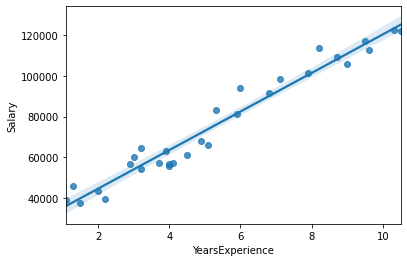

In [8]:
sns.regplot(x="YearsExperience",y="Salary",data=salary)

# coefficients

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# t_Value

In [10]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

# p_Value

In [11]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

# rsquared values

In [12]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Predict for new datapoint

In [13]:
# prediction for 2 and 3 years of experience
newdata = pd.Series([2,3])

In [14]:
salary_pred = pd.DataFrame(newdata,columns=['YearsExperience'])

In [15]:
model.predict(salary_pred)

0    44692.124842
1    54142.087163
dtype: float64